Our database is composed of the following variables:<br>
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s <br>
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s<br>
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y<br>
     4. bruises:                 bruises=t,no=f<br>
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s<br>
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n<br>
     7. gill-spacing:             close=c,crowded=w,distant=d<br>
     8. gill-size:                broad=b,narrow=n<br>
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y<br>
    10. stalk-shape:              enlarging=e,tapering=t<br>
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?<br>
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s<br>
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s<br>
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y<br>
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y<br>
    16. veil-type:                partial=p,universal=u<br>
    17. veil-color:               brown=n,orange=o,white=w,yellow=y<br>
    18. ring-number:              none=n,one=o,two=t<br>
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z<br>
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y<br>
    21. population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y<br>
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d<br>


In [14]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import warnings

In [2]:
# Fetch dataset 
mushroom = fetch_ucirepo(id=73) 

In [3]:
# Convert to pandas dataframe
data = pd.DataFrame(mushroom.data.features, columns=mushroom.data.feature_names, index=None)
data['poisonous'] = mushroom.data.targets

# delete the rows with missing values
data= data.dropna()

data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,b,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,w,y,p,e
8001,x,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,w,y,p,e
8038,x,y,g,t,n,f,c,b,w,e,...,w,w,p,w,t,p,w,y,p,e
8095,x,y,c,f,m,f,c,b,y,e,...,c,c,p,w,n,n,w,c,d,p


In [4]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode each column of the data dataframe
encoded_data = data.copy()
for column in encoded_data.columns:
    encoded_data[column] = encoder.fit_transform(encoded_data[column])

#Print the encoded data
encoded_data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,5,2,4,1,6,1,0,1,2,0,...,5,5,0,0,1,3,1,3,5,1
1,5,2,7,1,0,1,0,0,2,0,...,5,5,0,0,1,3,2,2,1,0
2,0,2,6,1,3,1,0,0,3,0,...,5,5,0,0,1,3,2,2,3,0
3,5,3,6,1,6,1,0,1,3,0,...,5,5,0,0,1,3,1,3,5,1
4,5,2,3,0,5,1,1,0,2,1,...,5,5,0,0,1,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,0,3,4,0,5,1,0,0,7,0,...,3,3,0,0,2,3,5,5,4,0
8001,5,3,4,0,5,1,0,0,7,0,...,3,3,0,0,2,3,5,5,4,0
8038,5,3,3,1,5,1,0,0,7,0,...,5,5,0,0,2,3,5,5,4,0
8095,5,3,1,0,4,1,0,0,8,0,...,1,1,0,0,0,2,5,1,0,1


We create a comparison of the data before and after using the encoder. This information is vital as we will have to use it to interpret the results.

In [5]:
# Compare original data with encoded data
for column in data.columns:
    print(f"Variable: {column}")
    print(f"Original values: {data[column].unique()}")
    print(f"Encoded values: {encoded_data[column].unique()}")
    print()

Variable: cap-shape
Original values: ['x' 'b' 's' 'f' 'k' 'c']
Encoded values: [5 0 4 2 3 1]

Variable: cap-surface
Original values: ['s' 'y' 'f' 'g']
Encoded values: [2 3 0 1]

Variable: cap-color
Original values: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'c']
Encoded values: [4 7 6 3 2 5 0 1]

Variable: bruises
Original values: ['t' 'f']
Encoded values: [1 0]

Variable: odor
Original values: ['p' 'a' 'l' 'n' 'f' 'c' 'm']
Encoded values: [6 0 3 5 2 1 4]

Variable: gill-attachment
Original values: ['f' 'a']
Encoded values: [1 0]

Variable: gill-spacing
Original values: ['c' 'w']
Encoded values: [0 1]

Variable: gill-size
Original values: ['n' 'b']
Encoded values: [1 0]

Variable: gill-color
Original values: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'r' 'y']
Encoded values: [2 3 0 4 7 1 6 5 8]

Variable: stalk-shape
Original values: ['e' 't']
Encoded values: [0 1]

Variable: stalk-root
Original values: ['e' 'c' 'b' 'r']
Encoded values: [2 1 0 3]

Variable: stalk-surface-above-ring
Original values: ['s' 'f' 'k' '

In [6]:
# Use encoded data
data = encoded_data

Dividimos los datos ya preprocesados

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# data (as pandas dataframes) 
X = data.iloc[:, :-1]
y = data["poisonous"]

# Split train and test using sklearn.model_selection.train_test_split function
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(0,50))

# Scale
scaler = MinMaxScaler()
XTrain = scaler.fit_transform(XTrain)
XTest = scaler.transform(XTest)


K-NN

In [8]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

k_range = list(range(1, 71))
param_grid = {'n_neighbors': k_range}
knn = neighbors.KNeighborsClassifier (metric='euclidean', weights='distance')

# Defining parameter range
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(XTrain,yTrain)
print('CV-Validation Accuracy', grid_search.best_score_)


#Obtain the best k and calculate results on test set
k = grid_search.best_params_['n_neighbors']
knn = neighbors.KNeighborsClassifier( n_neighbors = k, metric='euclidean', weights='distance')
knn.fit(XTrain, yTrain)


yhatTrain = knn.predict(XTrain)
print('For a K:' + str(k) + ' Train Error:' + str(np.mean(yhatTrain != yTrain)))
yhatTest = knn.predict(XTest)
print('For a K:' + str(k) + ' Test Error:' + str(np.mean(yhatTest != yTest)))

#Print test confusion matrix
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(yTest,yhatTest))
print(classification_report(yTest,yhatTest))

#Print performance metrics using sklearn.metrics package

print("Train accuracy",metrics.accuracy_score(yTrain, yhatTrain))
print("Test accuracy",metrics.accuracy_score(yTest, yhatTest))
print("Train Precision",metrics.precision_score(yTrain, yhatTrain))
print("Test Precision",metrics.precision_score(yTest, yhatTest))
print("Train Recall",metrics.recall_score(yTrain, yhatTrain))
print("Test Recall",metrics.recall_score(yTest, yhatTest))
print("Train F1",metrics.f1_score(yTrain, yhatTrain))
print("Test F1",metrics.f1_score(yTest, yhatTest))


CV-Validation Accuracy 1.0
For a K:1 Train Error:0.0
For a K:1 Test Error:0.0
----------------Test Confusion Matrix------------------
[[684   0]
 [  0 445]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       684
           1       1.00      1.00      1.00       445

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129

Train accuracy 1.0
Test accuracy 1.0
Train Precision 1.0
Test Precision 1.0
Train Recall 1.0
Test Recall 1.0
Train F1 1.0
Test F1 1.0


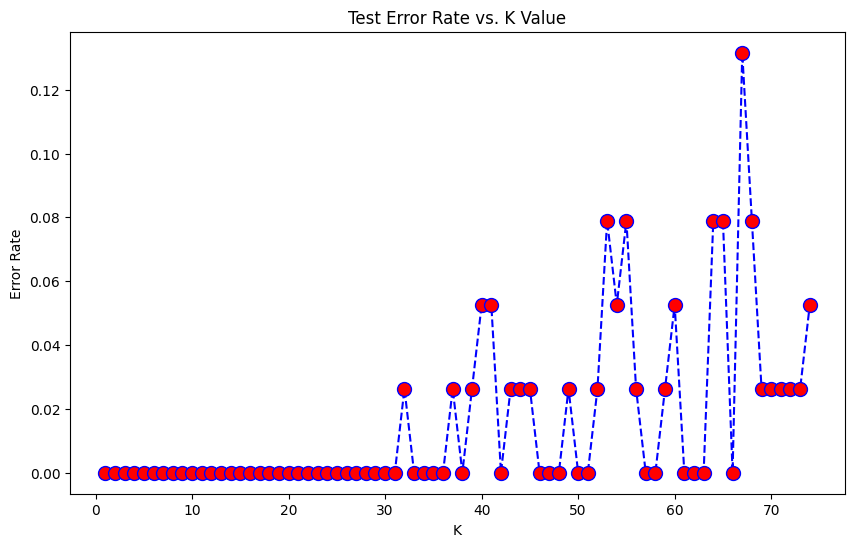

In [12]:
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into train and test
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2)

# Loop to check different values of K
error_rate_model = []

#Random subsampling
for i in range (1,75):

    # Create an instance of K - nearest neighbor classifier
    knn = neighbors.KNeighborsClassifier ( n_neighbors = i, metric='euclidean', weights="distance")
    error_rate_validation = []

    for j in range(1,20):
      # Split train and validation, since we are not using cross validation function
      XTrain, XValidation, yTrain, yValidation = train_test_split(XTrain, yTrain, test_size=2)

      # Train the classifier
      knn.fit(XTrain , yTrain)

      # Compute the test prediction according to the model
      yhatValidation = knn.predict(XValidation)
      error_rate_validation.append(np.mean(yhatValidation != yValidation))

    error_rate_model.append(np.mean(error_rate_validation))

#Plot the training and testing points (Train class 0 = red, Train class 1 = blue, Test class 0 = orange, Test class 1 = green)

plt.figure(figsize=(10,6))
plt.plot(range(1,75),error_rate_model,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Test Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

REGRESIÓN LOGÍSTICA

In [15]:
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore') # Ignore warnings

# Define parameter range
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logreg = LogisticRegression()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy')
grid_search.fit(XTrain, yTrain)
print('CV-Validation Accuracy', grid_search.best_score_)

# Obtain the best hyperparameters and calculate results on test set
C = grid_search.best_params_['C']
print(C)
logreg = LogisticRegression(C=C)
logreg.fit(XTrain, yTrain)

yhatTrain = logreg.predict(XTrain)
print('Train Error:', np.mean(yhatTrain != yTrain))
yhatTest = logreg.predict(XTest)
print('Test Error:', np.mean(yhatTest != yTest))

# Print test confusion matrix
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(yTest, yhatTest))
print(classification_report(yTest, yhatTest))

# Print performance metrics using sklearn.metrics package
print("Train accuracy:", metrics.accuracy_score(yTrain, yhatTrain))
print("Test accuracy:", metrics.accuracy_score(yTest, yhatTest))
print("Train Precision:", metrics.precision_score(yTrain, yhatTrain))
print("Test Precision:", metrics.precision_score(yTest, yhatTest))
print("Train Recall:", metrics.recall_score(yTrain, yhatTrain))
print("Test Recall:", metrics.recall_score(yTest, yhatTest))
print("Train F1:", metrics.f1_score(yTrain, yhatTrain))
print("Test F1:", metrics.f1_score(yTest, yhatTest))

CV-Validation Accuracy 0.9847127622979016
100
Train Error: 0.008220786846741044
Test Error: 0.01682905225863596
----------------Test Confusion Matrix------------------
[[679   6]
 [ 13 431]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       685
           1       0.99      0.97      0.98       444

    accuracy                           0.98      1129
   macro avg       0.98      0.98      0.98      1129
weighted avg       0.98      0.98      0.98      1129

Train accuracy: 0.991779213153259
Test accuracy: 0.983170947741364
Train Precision: 0.9920634920634921
Test Precision: 0.9862700228832952
Train Recall: 0.9858044164037855
Test Recall: 0.9707207207207207
Train F1: 0.9889240506329113
Test F1: 0.9784335981838819


SVM

In [ ]:
from sklearn.svm import SVC

# Define parameter range
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
svm = SVC(kernel='rbf')

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy')
grid_search.fit(XTrain, yTrain)
print('CV-Validation Accuracy', grid_search.best_score_)

# Obtain the best hyperparameters and calculate results on test set
C = grid_search.best_params_['C']
print(C)
gamma = grid_search.best_params_['gamma']
print(gamma)
svm = SVC(kernel='rbf', C=C, gamma=gamma)
svm.fit(XTrain, yTrain)

yhatTrain = svm.predict(XTrain)
print('Train Error:', np.mean(yhatTrain != yTrain))
yhatTest = svm.predict(XTest)
print('Test Error:', np.mean(yhatTest != yTest))

# Print test confusion matrix
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(yTest, yhatTest))
print(classification_report(yTest, yhatTest))

# Print performance metrics using sklearn.metrics package
print("Train accuracy:", metrics.accuracy_score(yTrain, yhatTrain))
print("Test accuracy:", metrics.accuracy_score(yTest, yhatTest))
print("Train Precision:", metrics.precision_score(yTrain, yhatTrain))
print("Test Precision:", metrics.precision_score(yTest, yhatTest))
print("Train Recall:", metrics.recall_score(yTrain, yhatTrain))
print("Test Recall:", metrics.recall_score(yTest, yhatTest))
print("Train F1:", metrics.f1_score(yTrain, yhatTrain))
print("Test F1:", metrics.f1_score(yTest, yhatTest))

CV-Validation Accuracy 1.0
1
1
Train Error: 0.0
Test Error: 0.0
----------------Test Confusion Matrix------------------
[[852   0]
 [  0 773]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Train accuracy: 1.0
Test accuracy: 1.0
Train Precision: 1.0
Test Precision: 1.0
Train Recall: 1.0
Test Recall: 1.0
Train F1: 1.0
Test F1: 1.0


ÁRBOLES DE DECISIÓN

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#This counters are used to obtain the accuracy "by hand"
contTrain = 0
contTest = 0

# Split train and test using sklearn.model_selection.train_test_split function
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.10, random_state=np.random.randint(100,size=1)[0])

#Convert pandas df to numerical arrays
XTrain = XTrain.values
XTest = XTest.values
yTrain = yTrain.values
yTest = yTest.values

#Define parameters of the decision tree to be checked with cross-validation
param_grid = {'min_samples_leaf': [5,10],
              'min_samples_split': [5, 10, 20],
              'max_depth':[10, 100],
              'criterion':['entropy','gini'],
              'ccp_alpha': [0]}

# Create a gridsearch using the Decision Tree Classifier
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)

# Train the classifier using training dataset
clf.fit(XTrain , yTrain)

#Obtain in the variable model the best Decision Tree classifier
print("Best estimator found by grid search:")
print(clf.best_estimator_)
model = clf.best_estimator_

#Calculate the Cross-validation error durint the training step
scores = cross_val_score(model, XTrain, yTrain, cv=10, scoring='accuracy')
print('Validation classification Accuracies: ', + scores)
print('Mean Validation Classification Accuracy: ', + np.mean(scores))


# Compute the train prediction according to the model
yhatTrain = clf.predict(XTrain)

# Check the result on the train examples
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

# Compute the test prediction according to the model
yhatTest = clf.predict(XTest)

# Check the result on the test examples
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


#Return the metric of accuracy
print('The train accuracy is: ' + str(contTrain/len(yTrain)))
print('The test accuracy is: ' + str(contTest/len(yTest)))

Best estimator found by grid search:
DecisionTreeClassifier(ccp_alpha=0, max_depth=10, min_samples_leaf=5,
                       min_samples_split=5)
Validation classification Accuracies:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Validation Classification Accuracy:  1.0
The train accuracy is: 1.0
The test accuracy is: 1.0


In [ ]:
#Print test confusion matrix
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(yTest,yhatTest))
print(classification_report(yTest,yhatTest))


----------------Test Confusion Matrix------------------
[[695   0]
 [  0 434]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       695
           1       1.00      1.00      1.00       434

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



We represent the reasoning followed by our models graphically, in two different ways.

In [ ]:
from sklearn.tree import export_text

texto_modelo = export_text(
                    decision_tree = model,
                    feature_names = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                                        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                                        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                                        'stalk-surface-below-ring', 'stalk-color-above-ring', 
                                        'stalk-color-below-ring', 'veil-type',
                                        'veil-color', 'ring-number', 'ring-type',
                                        'spore-print-color', 'population', 'habitat'])
print(texto_modelo)

|--- gill-color <= 3.50
|   |--- population <= 3.50
|   |   |--- stalk-root <= 0.50
|   |   |   |--- class: 1
|   |   |--- stalk-root >  0.50
|   |   |   |--- class: 0
|   |--- population >  3.50
|   |   |--- habitat <= 4.50
|   |   |   |--- stalk-surface-below-ring <= 0.50
|   |   |   |   |--- gill-size <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- gill-size >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- stalk-surface-below-ring >  0.50
|   |   |   |   |--- class: 1
|   |   |--- habitat >  4.50
|   |   |   |--- bruises <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- bruises >  0.50
|   |   |   |   |--- class: 1
|--- gill-color >  3.50
|   |--- spore-print-color <= 1.50
|   |   |--- stalk-root <= 2.00
|   |   |   |--- class: 1
|   |   |--- stalk-root >  2.00
|   |   |   |--- class: 0
|   |--- spore-print-color >  1.50
|   |   |--- gill-size <= 0.50
|   |   |   |--- ring-number <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- ring-number >  0.50

Profundidad del árbol: 7
Número de nodos terminales: 20


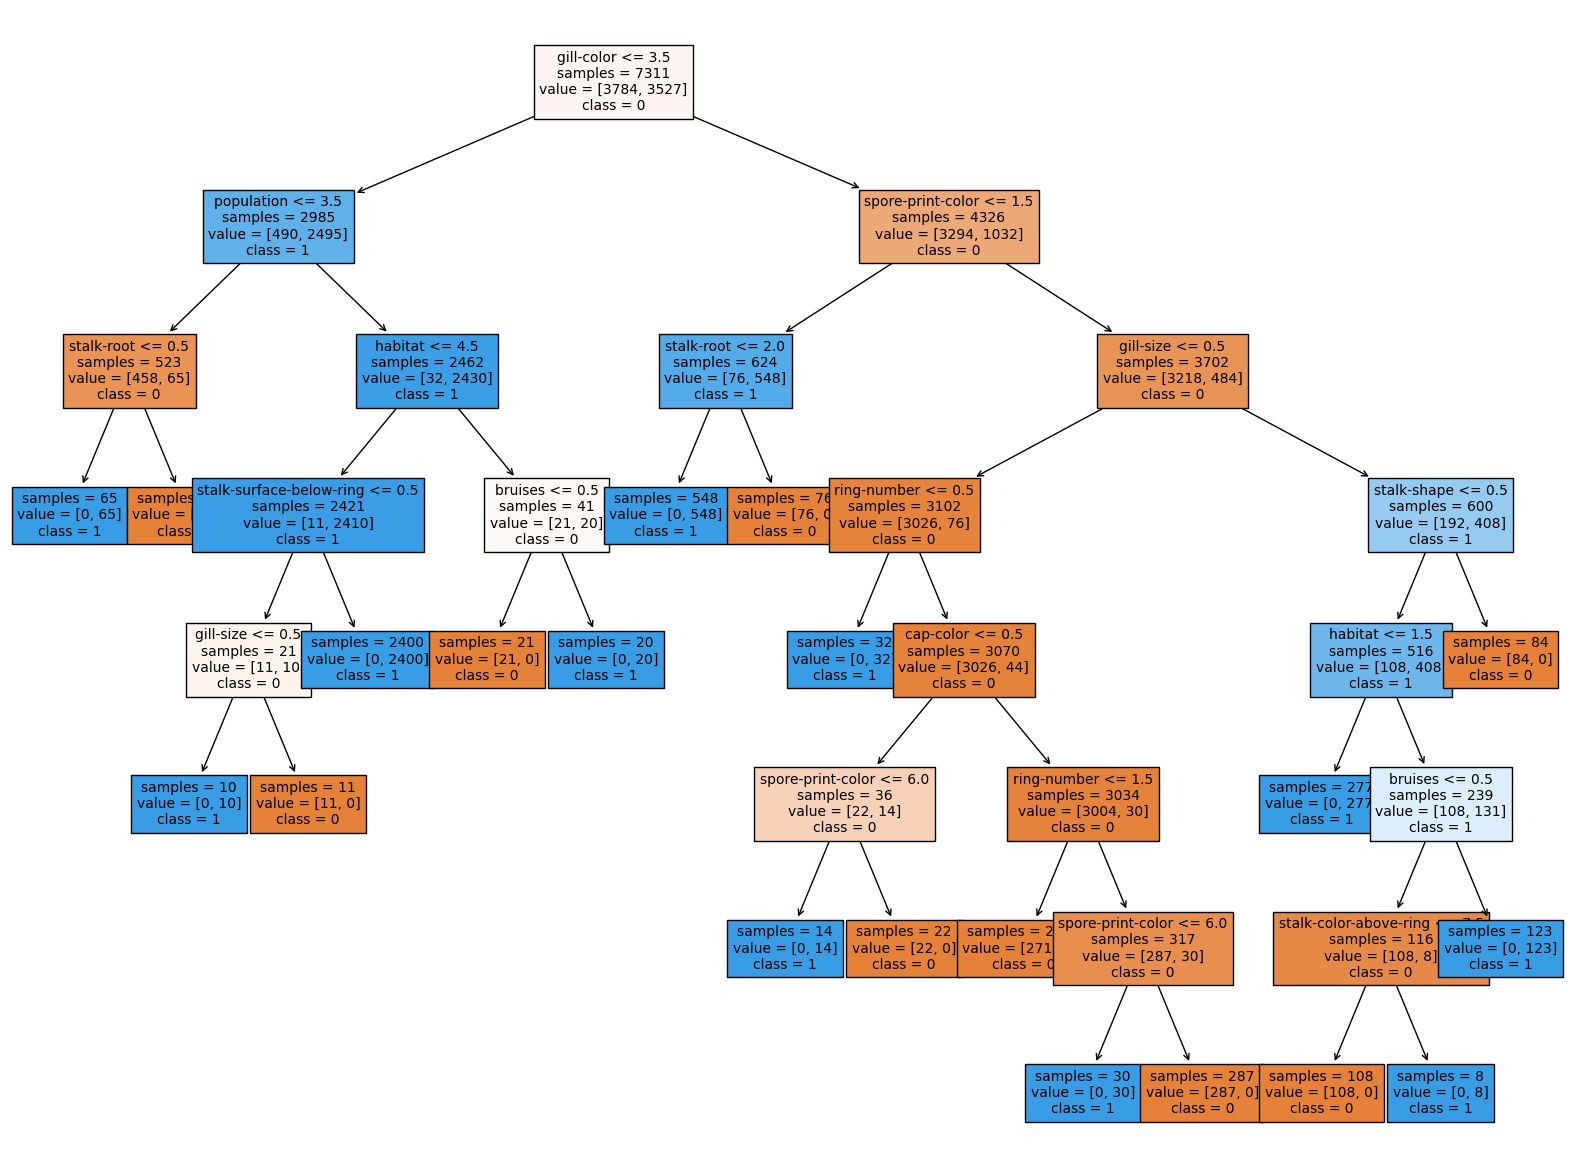

In [ ]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 15))

print(f"Tree depth: {model.get_depth()}")
print(f"Number of terminla nodes: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                                        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                                        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                                        'stalk-surface-below-ring', 'stalk-color-above-ring', 
                                        'stalk-color-below-ring', 'veil-type',
                                        'veil-color', 'ring-number', 'ring-type',
                                        'spore-print-color', 'population', 'habitat'],
            class_names   = ['0','1'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )